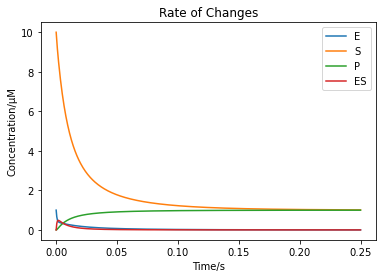

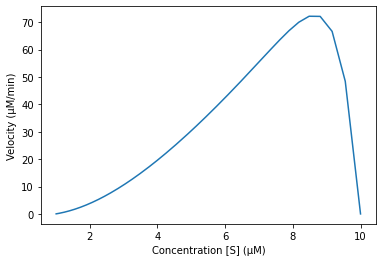

The maximum value of velocity V:  72.1724322962807


In [2]:
import matplotlib.pyplot as plt

k1 = 100
k2 = 600
k3 = 150
E = 1.0
S = 10.0
steps = 500


def update(E, ES, S):
    k_E = -k1*E*S+k2*ES
    k_S = -k1*E*S-k2*ES
    k_ES = k1*E*S-(k2+k3)*ES
    k_P = k3*ES

    return k_E, k_S, k_ES, k_P

def rk4(E, S, steps):
    ES = 0.0
    P = 0.0
    t = 0
    h = 0.0005   # step width is 0.001s
    t_list = [t]
    E_list = [E]
    S_list = [S]
    ES_list = [ES]
    P_list = [P]
    for i in range(steps):
        t = t+h
        k1_E, k1_S, k1_ES, k1_P = update(E, ES, S)
        k2_E, k2_S, k2_ES, k2_P = update(E+k1_E*h/2, ES+k1_ES*h/2, S+k1_S*h/2)
        k3_E, k3_S, k3_ES, k3_P = update(E+k2_E*h/2, ES+k2_ES*h/2, S+k2_S*h/2)
        k4_E, k4_S, k4_ES, k4_P = update(E+k3_E*h, ES+k3_ES*h, S+k3_S*h)

        E = E + h*(k1_E+k2_E*2+k3_E*2+k4_E)/6
        ES = ES + h*(k1_ES+k2_ES*2+k3_ES*2+k4_ES)/6
        S = S + h*(k1_S+k2_S*2+k3_S*2+k4_S)/6
        P = P + h*(k1_P+k2_P*2+k3_P*2+k4_P)/6

        t_list.append(t)
        E_list.append(E)
        S_list.append(S)
        ES_list.append(ES)
        P_list.append(P)
    
    plt.figure()
    plt.xlabel("Time/s")
    plt.ylabel("Concentration/µM")
    plt.plot(t_list, E_list, label="E")
    plt.plot(t_list, S_list, label="S")
    plt.plot(t_list, P_list, label="P")
    plt.plot(t_list, ES_list, label="ES")
    plt.title("Rate of Changes")
    plt.legend()
    plt.show()

    return S_list, ES_list


def cal_V(S_list, ES_list):
    V = []
    for ES in ES_list:
        V.append(ES*k3)
    
    plt.figure()
    plt.plot(S_list, V)
    plt.xlabel("Concentration [S] (µM)")
    plt.ylabel("Velocity (µM/min)")
    plt.show()
    
    print('The maximum value of velocity V: ',max(V))




# RK4 method call
S_list, ES_list= rk4(E,S,steps)

cal_V(S_list, ES_list)
